# 9장 데이터 시각화 알아보기

- 판다스는 그래프를 처리하는 matplotlib 모듈과 seaborn 모듈로 데이터를 시각화하는 기능을 기본으로 제공
- 참고문서 : 
  - Pyplot의 개요와 작성기초 : https://kongdols-room.tistory.com/81  
  - 

In [217]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
scipy 1.5.0
sklearn 0.23.1
pandas 1.0.5
matplotlib 3.2.2


In [218]:
import warnings     # 파이썬 기본적인 경고메세지 처리하기     

warnings.filterwarnings(action='ignore')      # 기본적인 경고메세지 무시하기 
# warnings.filterwarnings(action='default')    # 기본적인 경고메세지 기본값으로 표시하기   

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

- Jupyter Notebook에서 그래프를 별도의 창에 표시하지 않고 내부에 출력하기 위해서는 
  - %matplotlib inline 명령을 실행해야 한다.  

In [220]:
%matplotlib inline

##  예제 9-1 그래프 틀과 세부 그래프 표시하기

In [221]:
import numpy as np

In [222]:
x = np.linspace(0, 2*np.pi, 30)   # np.pi값을 계산한 결과와 30개를 선택한다.  
y = np.sin(x)                     # 변수 x의 sin값을 선택한다.     

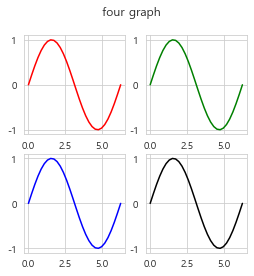

In [223]:
fig, axes = plt.subplots(2,2,figsize=(4,4))
axes[0,0].plot(x,y, 'r')        # red 
axes[0,1].plot(x,y, 'g')        # green 
axes[1,0].plot(x,y, 'b')        # blue 
axes[1,1].plot(x,y, 'k')        # black 
for ax in axes.ravel():
    ax.margins(0.05)
    
fig.suptitle(" four graph ")    # 총 4개의 그래프가 그려질 틀을 형성함  

plt.show()

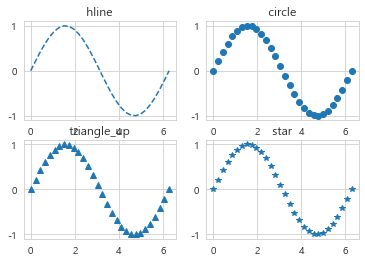

In [224]:
fig = plt.figure()

ax1 = fig.add_subplot(221)    # 4 개의 그래프를 그리기 위한 간격조정 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x,y, '--')
ax2.plot(x,y, 'o')
ax3.plot(x,y, "^")
ax4.plot(x,y, '*')

ax1.set_title(" hline ")
ax2.set_title(" circle ")
ax3.set_title(" triangle_up ")
ax4.set_title(" star ")

plt.show()

##  예제 9-2 그래프에 세부 정보 표시하기

In [225]:
%%writefile data1.txt
0 0
1 1
2 4
3 9
4 16
5 25
6 36

Overwriting data1.txt


In [226]:
ff = open('data1.txt','r')

In [227]:
xx = [[float(s) for s in line.split()] for line in ff]

In [228]:
xx

[[0.0, 0.0],
 [1.0, 1.0],
 [2.0, 4.0],
 [3.0, 9.0],
 [4.0, 16.0],
 [5.0, 25.0],
 [6.0, 36.0]]

In [229]:
[*xx]

[[0.0, 0.0],
 [1.0, 1.0],
 [2.0, 4.0],
 [3.0, 9.0],
 [4.0, 16.0],
 [5.0, 25.0],
 [6.0, 36.0]]

In [230]:
x,y = zip(*xx)

In [231]:
x

(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)

In [232]:
y

(0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0)

In [233]:
ff.close()

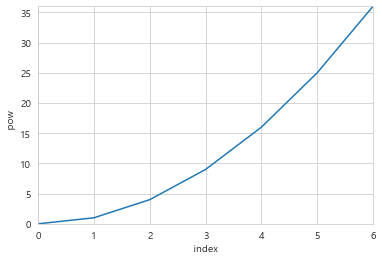

In [234]:
with open('data1.txt','r') as f :
    X, Y = zip(*[[float(s) for s in line.split()] for line in f])
    
plt.xlabel(" index ")
plt.ylabel(" pow   ")

plt.axis([0,6,0,36])
    
plt.plot(X,Y)
plt.show()

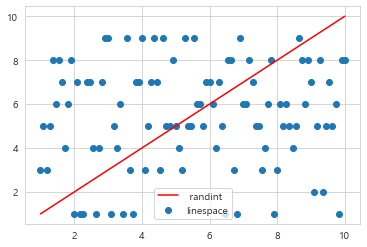

In [235]:
x = np.linspace(1,10, 100)
y = np.random.randint(1,10,100)
plt.scatter(x,y,label="linespace")
plt.plot(x,x,'r',label=" randint")
plt.legend()

plt.show()

- 참고문서 : 
  - Windows용 GPU Driver 설치 : https://m.blog.naver.com/chandong83/221112939772   
  - Tensorflow설치 

In [236]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\COSMOS\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: 지정된 모듈을 찾을 수 없습니다.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [237]:
a= np.array([1,2,3,4,5,6], dtype=np.float32)
b= np.array([2,3,4,4,7,7], dtype=np.float32)
c=tf.matmul(a.reshape(3,2),b.reshape(2,3))


NameError: name 'tf' is not defined

In [238]:
sess=tf.Session()
a=sess.run(c)
for i, row in enumerate(a):
    x =np.arange(len(row))
    plt.bar(x+(0.25*i),row,color= (lambda i: ("b g r".split())[i])(i), width=0.25)
    
plt.show()
print(a)

NameError: name 'tf' is not defined

In [239]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

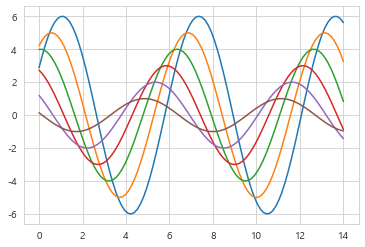

In [240]:
sinplot()

In [241]:
import seaborn as sns

In [242]:
sns.set_style('darkgrid')

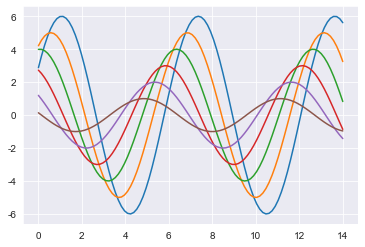

In [243]:
sinplot()

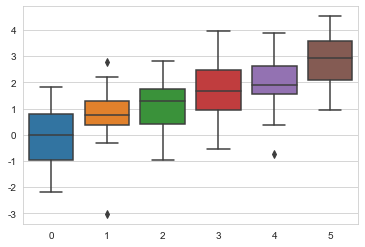

In [244]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
plt.show()

## 예제 9-3  한글 처리하기

In [245]:
plt.rcParams['font.size']

10.0

In [246]:
plt.rcParams['font.family']

['sans-serif']

In [247]:
rc_s = pd.Series(plt.rcParams)

In [248]:
rc_s.shape

(302,)

In [249]:
import sys

In [250]:
sys.platform

'win32'

In [402]:
import matplotlib.font_manager as fm

In [560]:
if sys.platform == 'win32' :
    font_path = 'C:/Windows/Fonts/malgun.ttf'          # 맑은 고딕서체를 기본으로 사용 HANBatang.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=18)
    
    path_pen = 'C:/Windows/Fonts/malgunbd.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=18)

In [561]:
if sys.platform == 'darwin'  :
    path = '/Users/plusjune/Library/Fonts/NanumMyeongjo.ttf'
    fontprop = fm.FontProperties(fname=path, size=18)
    path_pen = '/Users/plusjune/Library/Fonts/NanumPen.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=34)

In [562]:
plt.rcParams['font.family']

['Malgun Gothic']

In [563]:
if sys.platform == 'win32' :
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [564]:
plt.rcParams['font.family']

['Malgun Gothic']

In [565]:
import numpy as np

In [566]:
data = np.random.randint(1000, 6000, 50)

In [567]:
data

array([4169, 2078, 4196, 4780, 4538, 1809, 3627, 2395, 4828, 2409, 4308,
       4565, 3522, 1824, 1917, 3323, 5954, 1139, 5714, 5462, 3049, 1687,
       4375, 2401, 2722, 3063, 1483, 5954, 2109, 4491, 1009, 1111, 3036,
       4832, 2405, 3538, 4904, 1894, 5471, 4341, 4732, 5264, 1079, 2049,
       1889, 4782, 5385, 4569, 3992, 4629])

In [568]:
import matplotlib.pyplot as plt

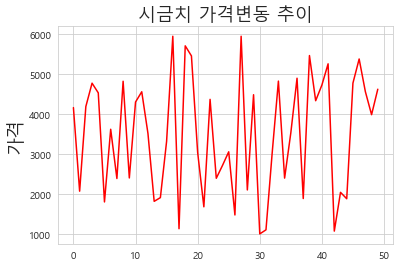

In [569]:
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

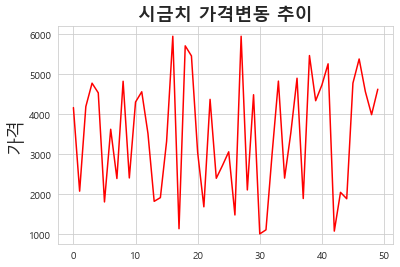

In [570]:
plt.plot(range(50), data, 'r')
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop1)
plt.show()

## 예제 9-4  plot 그래프 그리기

In [571]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))

In [572]:
ts = ts.cumsum()

In [573]:
ts.head()

2016-01-01    2.321114
2016-01-02    2.456498
2016-01-03    1.293782
2016-01-04    1.990305
2016-01-05    3.092291
Freq: D, dtype: float64

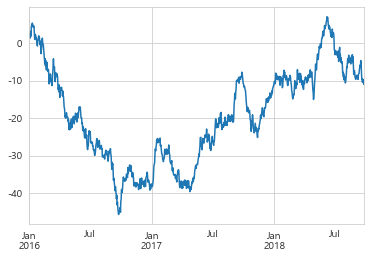

In [574]:
ts.plot()
plt.show()

In [575]:
ts.plot

In [576]:
for i in dir(ts.plot) :
    if not i.startswith("_") :
        print(i, end=",  ")

area,  bar,  barh,  box,  density,  hexbin,  hist,  kde,  line,  pie,  scatter,  

In [577]:
ts.plot.line

<bound method PlotAccessor.line of <pandas.plotting._core.PlotAccessor object at 0x000001F142958D90>>

In [578]:
ts.plot.line.__func__

<function pandas.plotting._core.PlotAccessor.line(self, x=None, y=None, **kwargs)>

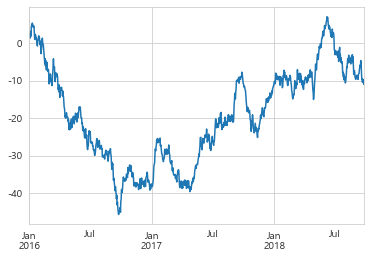

In [579]:
ts.plot.line()

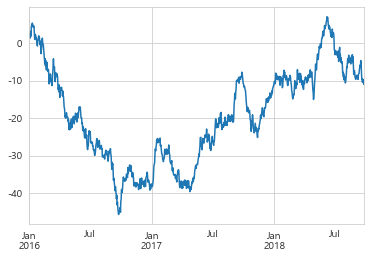

In [580]:
ts.plot(kind='line')

In [581]:
ts.index[:10]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [582]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('가나다라'))

In [583]:
df = df.cumsum()

In [584]:
df.head()

가         나         다         라
2016-01-01  0.207897  0.587176  0.100035  0.997962
2016-01-02 -0.372425 -1.283905 -1.061908  0.059758
2016-01-03 -0.087916 -1.944192 -1.899427  0.484479
2016-01-04 -1.607795 -1.657042 -5.023860 -0.716164
2016-01-05 -2.438784 -1.022418 -5.971745 -0.942529

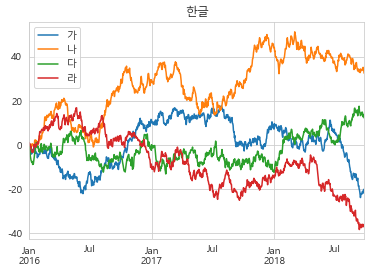

In [585]:
df.plot(title="한글")
plt.show()

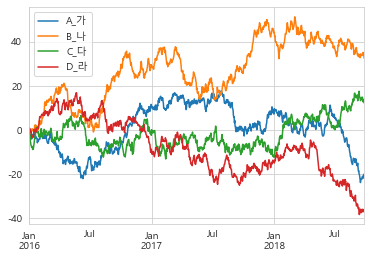

In [586]:
df.plot.line().legend(['A_가','B_나','C_다','D_라'])

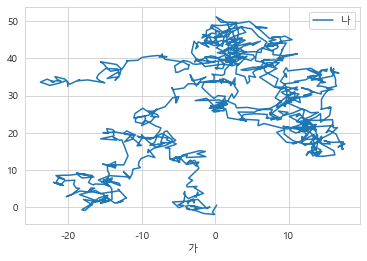

In [587]:
df.plot(x='가', y=['나'])

In [588]:
plt.rcParams['axes.unicode_minus'] = False

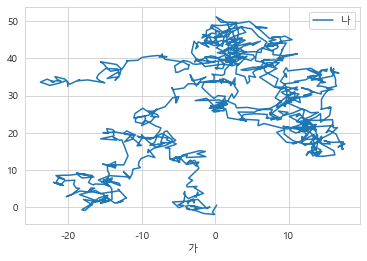

In [589]:
df.plot(x='가', y=['나'])

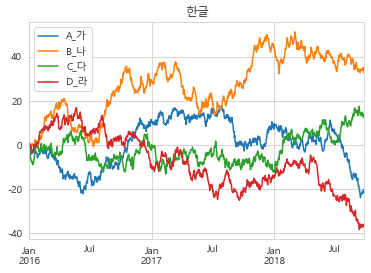

In [590]:
fig, ax = plt.subplots()

ax = df.plot(title="한글",kind='line',ax=ax).legend(['A_가','B_나','C_다','D_라'])

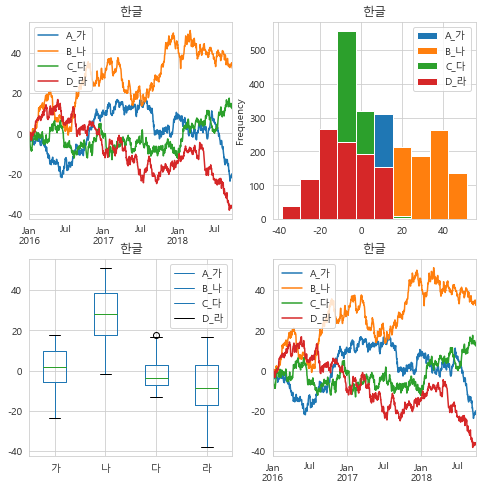

In [591]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0] = df.plot(title="한글",kind='line',ax=axes[0,0]).legend(['A_가','B_나','C_다','D_라'])
axes[0,1] = df.plot(title="한글",kind='hist',ax=axes[0,1]).legend(['A_가','B_나','C_다','D_라'])
axes[1,0] = df.plot(title="한글",kind='box',ax=axes[1,0]).legend(['A_가','B_나','C_다','D_라'])
axes[1,1] = df.plot(title="한글",kind='line',ax=axes[1,1]).legend(['A_가','B_나','C_다','D_라'])

## 예제 9-5  복잡한 plot 그래프 그리기

In [592]:
import numpy as np

In [593]:
ser = pd.Series(np.random.randn(10000))

In [594]:
plt.rcParams['axes.unicode_minus'] = False

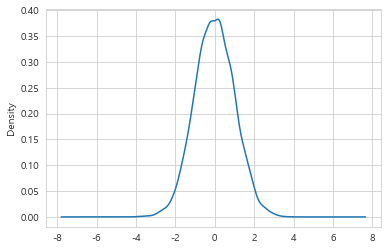

In [595]:
ser.plot.kde()

In [596]:
ser1 = pd.Series(np.random.rand(10000))

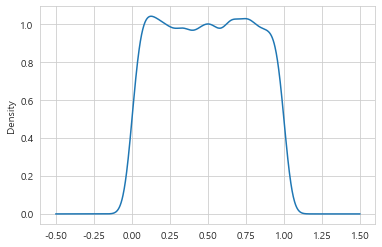

In [597]:
ser1.plot.kde()

In [598]:
import seaborn as sns

In [599]:
df = sns.load_dataset('iris')

In [600]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

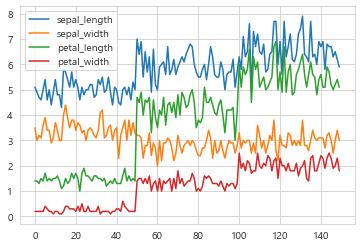

In [601]:
df.plot()

In [602]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [603]:
from pandas.plotting import andrews_curves

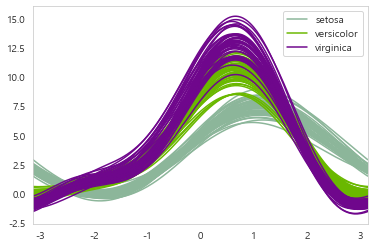

In [604]:
andrews_curves(df, 'species')

In [605]:
from pandas.plotting import parallel_coordinates

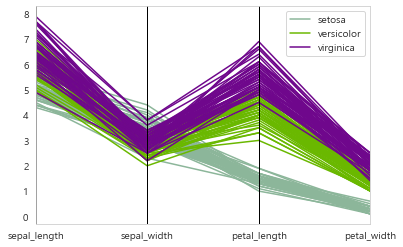

In [606]:
parallel_coordinates(df, 'species')

In [607]:
from pandas.plotting import autocorrelation_plot

In [608]:
import numpy as np

In [609]:
dr = pd.date_range(start='2017-01-01', end='2017-12-31')

df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["Values"])

In [610]:
df.head()

Values
2017-01-01       0
2017-01-02       1
2017-01-03       2
2017-01-04       3
2017-01-05       4

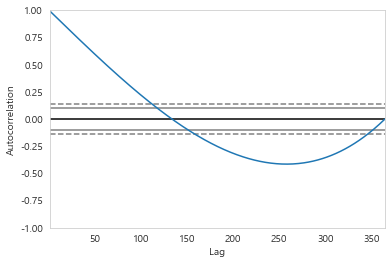

In [611]:
autocorrelation_plot(df)
plt.show()

In [612]:
import numpy as np

In [613]:
data = pd.Series(np.random.rand(1000))

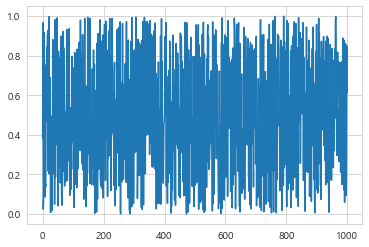

In [614]:
data.plot()

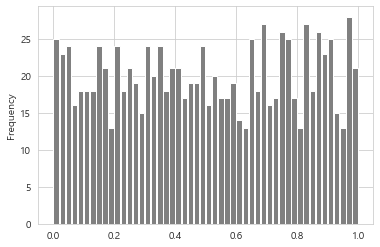

In [615]:
data.plot.hist(bins=50,rwidth=0.9, color='grey')

In [616]:
from pandas.plotting import bootstrap_plot

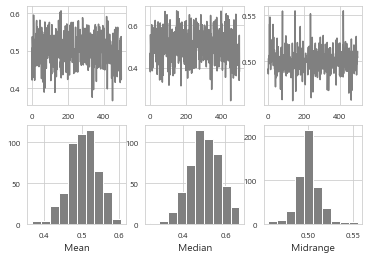

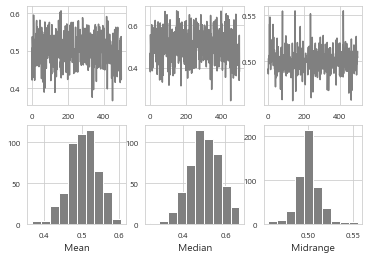

In [617]:
bootstrap_plot(data, size=50, samples=500, color='grey')

In [618]:
import numpy as np

In [619]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

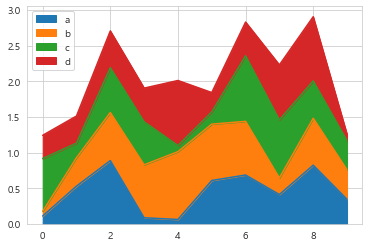

In [620]:
df.plot.area()

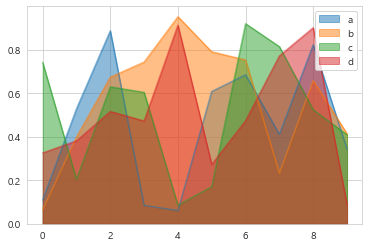

In [621]:
df.plot.area(stacked=False)

In [622]:
import pandas as pd

In [623]:
import matplotlib.pyplot as plt
%matplotlib inline

## 예제 9-6  점 그래프 그리기

In [624]:
import seaborn as sns

In [625]:
df_a = sns.load_dataset('tips')

In [626]:
df_a.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

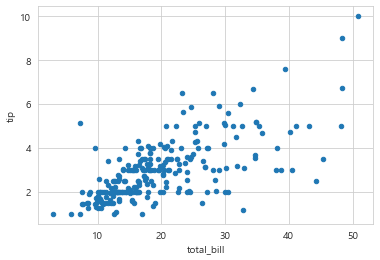

In [627]:
df_a.plot.scatter('total_bill','tip')

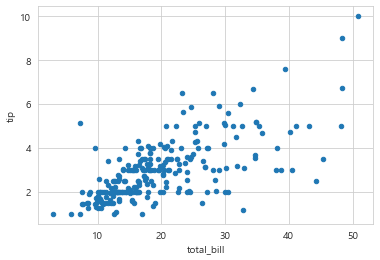

In [628]:
df_a.plot(kind='scatter',x='total_bill',y='tip')

In [629]:
from pandas.plotting import lag_plot

In [630]:
import numpy as np

In [631]:
data = pd.Series(0.1 * np.random.rand(1000) +
                 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

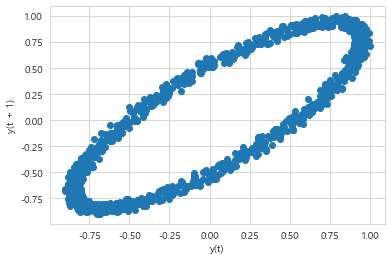

In [632]:
lag_plot(data)

In [633]:
from pandas.plotting import radviz

In [634]:
df_i = sns.load_dataset('iris')

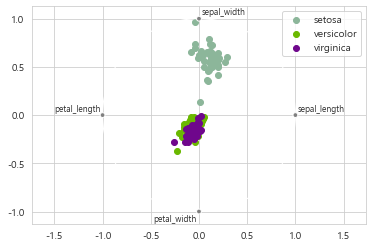

In [635]:
radviz(df_i, 'species')

## 예제 9-7  히스토그램 그래프 그리기

In [636]:
import numpy as np

In [637]:
mu = 100
sigma = 10

In [638]:
np.random.seed(0)

x = np.random.normal(mu,sigma,10000)

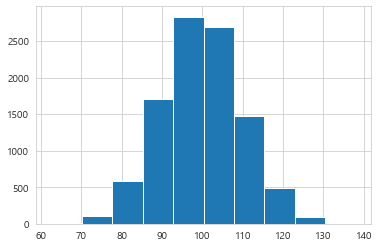

In [639]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

In [640]:
import seaborn as sns

In [641]:
df_a = sns.load_dataset('tips')

In [642]:
df_a.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

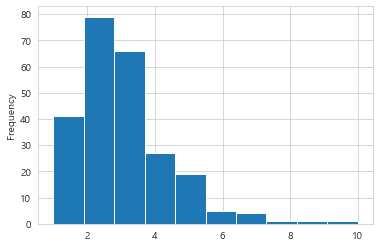

In [643]:
df_a['tip'].plot(kind='hist')

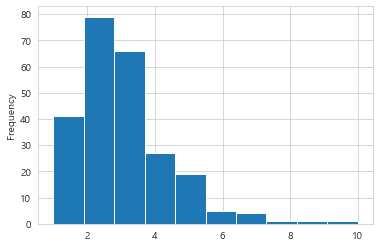

In [644]:
df_a['tip'].plot.hist()

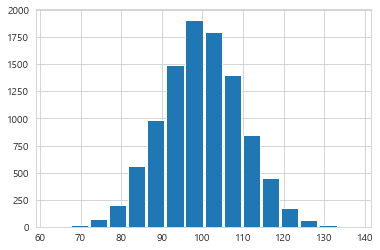

In [645]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

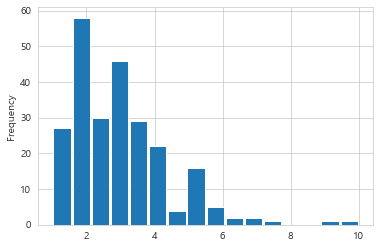

In [646]:
df_a['tip'].plot(kind='hist',bins=16, rwidth=0.9)

In [647]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
              'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

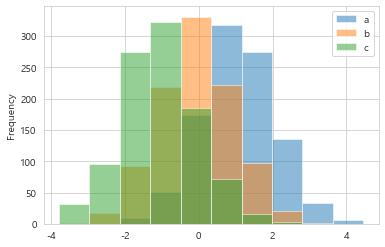

In [648]:
df4.plot.hist(alpha=0.5)

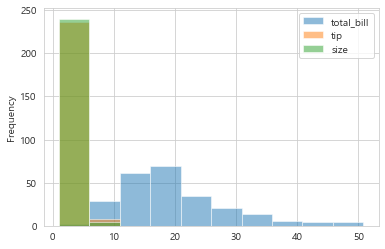

In [649]:
df_a.plot.hist(alpha=0.5)

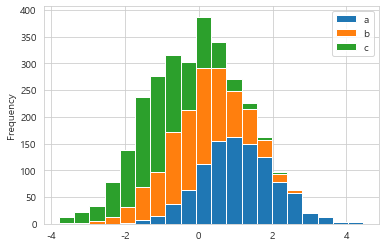

In [650]:
df4.plot.hist(stacked=True, bins=20)

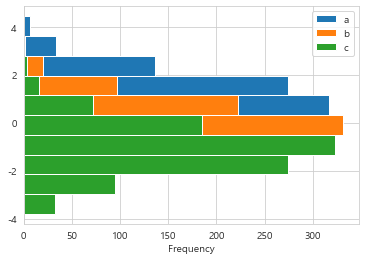

In [651]:
df4.plot.hist(orientation='horizontal')

In [652]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))

In [653]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('ABCD'))

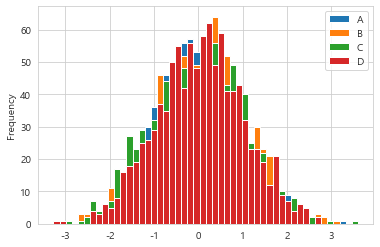

In [654]:
df.plot.hist(bins=50)

In [655]:
df['A'].head()

2016-01-01   -0.706413
2016-01-02    0.465122
2016-01-03   -2.678413
2016-01-04   -0.015170
2016-01-05    0.975021
Freq: D, Name: A, dtype: float64

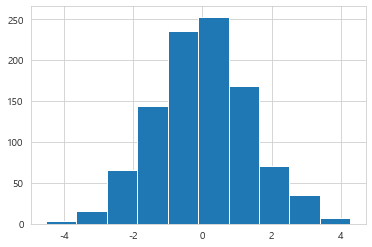

In [656]:
df['A'].diff().hist()

In [657]:
df.diff().head()

A         B         C         D
2016-01-01       NaN       NaN       NaN       NaN
2016-01-02  1.171535 -0.068667 -1.760642 -1.443059
2016-01-03 -3.143535  0.736521 -0.080661 -1.116249
2016-01-04  2.663243 -1.247057  0.972963  0.673785
2016-01-05  0.990191 -1.144344 -0.271189 -1.461556

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F144B67F40>,
      dtype=object)

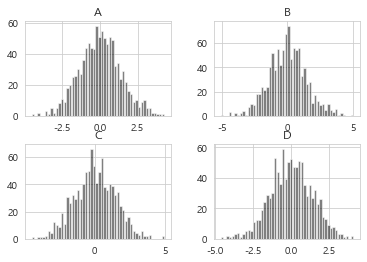

In [658]:
df.diff().hist(rwidth=0.9, color='k', alpha=0.5, bins=50)

In [659]:
data = pd.Series(np.random.randn(1000))

In [660]:
data.head()

0    0.006014
1    0.752771
2    0.232441
3    0.591500
4   -1.021144
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F144B1F220>,
      dtype=object)

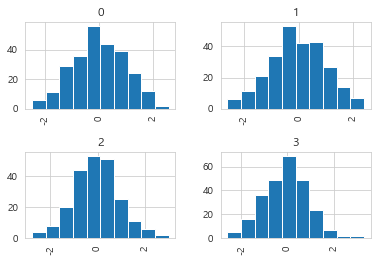

In [661]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

### 실제 데이터의 범위 와 타이틀 세팅

   . hist 메소드 내의 range에 범위 지정
   . set_title 로 그래프 제목 지정 

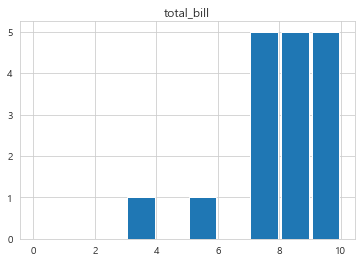

In [662]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(df_a['total_bill'],range=(0,10), rwidth=0.9)
ax.set_title('total_bill')

plt.show()

####  타이틀을 표시하기

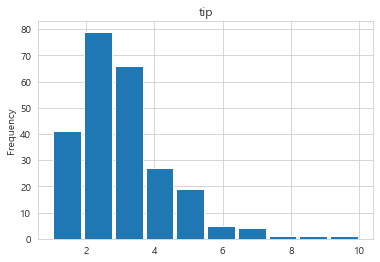

In [663]:
df_a['tip'].plot(kind='hist',bins=10, rwidth=0.9, title='tip')

## 예제 9-8  파이 그래프 그리기


In [664]:
import numpy as np

In [665]:
data = np.linspace(0,10,30).reshape(10,3)
index= ['a','b','c','d','e','f','g','h','i','j']

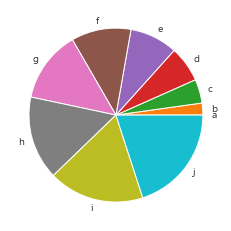

In [666]:
plt.pie(data[:,0],labels=index)
plt.show()

In [667]:
from matplotlib.pyplot import pie, axis, show

df = pd.DataFrame({
    'Sex': ['female', 'male', 'female'],
    'Smoke': [1, 1, 1]})

In [668]:
sums = df.Smoke.groupby(df.Sex).sum()
print(sums)

Sex
female    2
male      1
Name: Smoke, dtype: int64


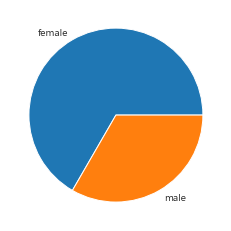

In [669]:
axis('normal')
pie(sums, labels=sums.index)
show()

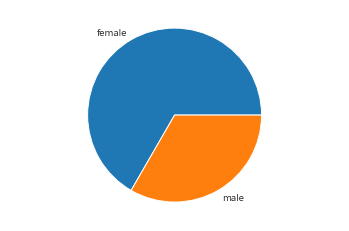

In [670]:
axis('equal')
pie(sums, labels=sums.index)
show()

In [671]:
import seaborn as sns

In [672]:
df_a = sns.load_dataset('tips')

In [673]:
df_a.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [674]:
ser = df_a['time']

In [675]:
ser.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

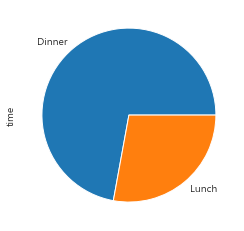

In [676]:
ser.value_counts().plot(kind='pie', labels=ser.value_counts().index)
plt.show()

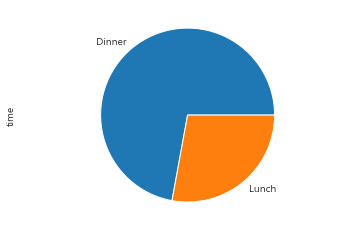

In [677]:
axis('equal')
ser.value_counts().plot.pie(labels=ser.value_counts().index)
plt.show()

## 예제 9-9  상자 그래프 그리기

In [678]:
import numpy as np

In [679]:
df_b = pd.DataFrame(np.random.random((6,10)))

In [680]:
df_b.head()

0         1         2         3         4         5         6  \
0  0.845662  0.074485  0.882506  0.580129  0.946892  0.180054  0.772033   
1  0.179450  0.996842  0.831118  0.291287  0.505930  0.702724  0.227868   
2  0.405074  0.981862  0.147393  0.109743  0.636485  0.823172  0.458884   
3  0.052555  0.213178  0.808108  0.050355  0.508930  0.805432  0.983920   
4  0.118677  0.952313  0.845799  0.680742  0.880623  0.892246  0.429405   

          7         8         9  
0  0.608870  0.670553  0.393756  
1  0.300599  0.908234  0.407301  
2  0.396073  0.799711  0.606471  
3  0.165689  0.992271  0.701241  
4  0.321154  0.787844  0.476463

In [681]:
df_b.max()

0    0.928622
1    0.996842
2    0.882506
3    0.738119
4    0.946892
5    0.892246
6    0.983920
7    0.984096
8    0.992271
9    0.701241
dtype: float64

In [682]:
df_b.min()

0    0.052555
1    0.074485
2    0.147393
3    0.050355
4    0.400238
5    0.180054
6    0.181107
7    0.165689
8    0.452706
9    0.393756
dtype: float64

In [683]:
df_b.quantile([0.25, 0.5,0.75])

0         1         2         3         4         5         6  \
0.25  0.133870  0.274350  0.813860  0.155129  0.506680  0.395976  0.278252   
0.50  0.292262  0.705090  0.837492  0.435708  0.572708  0.754078  0.444144   
0.75  0.735515  0.974475  0.845316  0.655589  0.819588  0.818737  0.693746   

             7         8         9  
0.25  0.305738  0.699876  0.423682  
0.50  0.358614  0.793777  0.474645  
0.75  0.555671  0.881103  0.573969

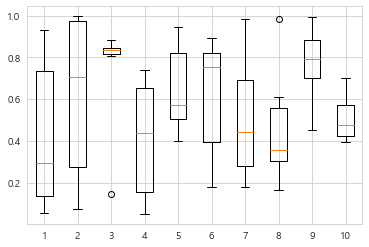

In [684]:
plt.boxplot(df_b.T)
plt.show()

In [685]:
df_c = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

In [686]:
df_c.head()

A         B         C         D         E
0  0.307049  0.375432  0.243553  0.162592  0.470908
1  0.946255  0.816258  0.356425  0.293377  0.596986
2  0.777434  0.618414  0.395111  0.327337  0.214357
3  0.422368  0.308170  0.463605  0.437184  0.182767
4  0.931406  0.763486  0.207246  0.394561  0.542357

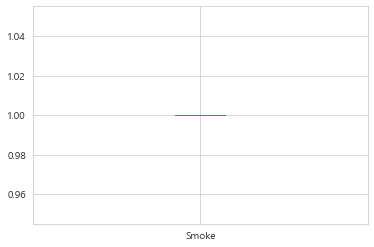

In [687]:
df.plot.box()

In [688]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

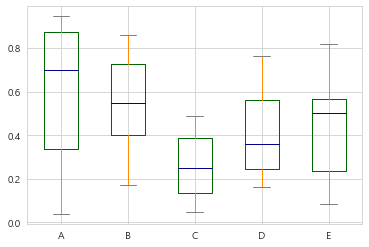

In [689]:
df_c.plot.box(color=color, sym='r+')

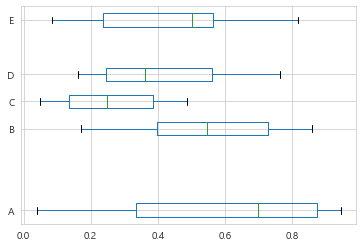

In [690]:
df_c.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [691]:
df_a.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [692]:
members = df_a.select_dtypes(include='number')

In [693]:
members.head()

total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       21.01  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4

In [694]:
members.shape

(244, 3)

In [695]:
members_ = members[:100]

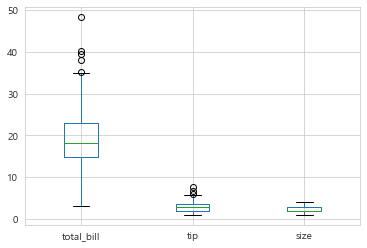

In [696]:
members_.plot(kind='box')

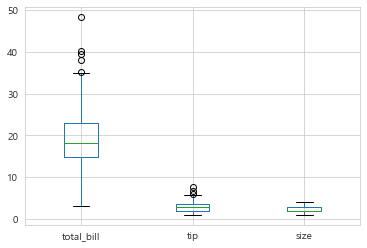

In [697]:
members_.plot.box()

## 예제 9-10  막대 그래프 그리기

In [698]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [699]:
df2.head()

a         b         c         d
0  0.843266  0.183185  0.506619  0.522083
1  0.575262  0.164370  0.828224  0.584029
2  0.641475  0.246053  0.080128  0.672051
3  0.754700  0.657890  0.702239  0.041359
4  0.179737  0.575565  0.656998  0.208492

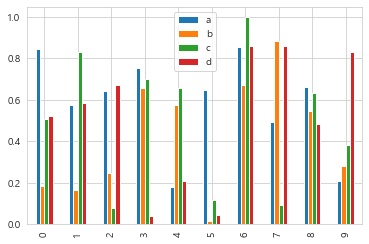

In [700]:
df2.plot.bar()

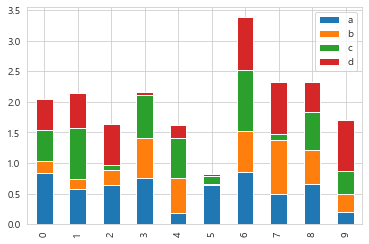

In [701]:
df2.plot.bar(stacked=True)

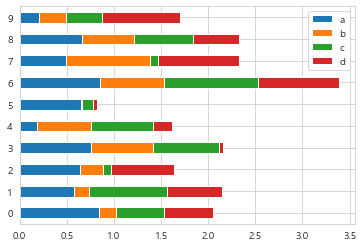

In [702]:
df2.plot.barh(stacked=True)

In [703]:
df_a.iloc[:5]

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

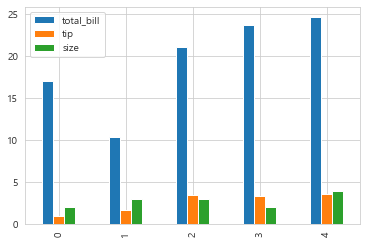

In [704]:
df_a.iloc[:5].plot(kind='bar')

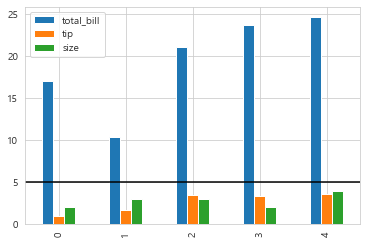

In [705]:
df_a.iloc[:5].plot.bar()
plt.axhline(5, color='k')